<a href="https://colab.research.google.com/github/Kimi-chuheng/feature-multi-modal-analysis/blob/main/feature_multi_modal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets torch torchvision pandas matplotlib seaborn plotly wordcloud pillow opencv-python zipfile36

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import zipfile
# Extract dataset
zip_path = "fer2013.zip" # Ensure correct uploaded filename
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall("fer2013")
# Confirm extraction
print("Extracted files:", os.listdir("fer2013"))


Extracted files: ['test', 'train']


In [ ]:
import pandas as pd
import re
import string

# Load Sentiment140 dataset
csv_path = "fer2013/sentiment140/training.1600000.processed.noemoticon.csv"
df = pd.read_csv(csv_path, encoding="ISO-8859-1", header=None, on_bad_lines="skip")

df.columns = ["sentiment", "id", "date", "query", "user", "text"]
df = df[["sentiment", "text"]]  # Keep relevant columns

# Convert sentiment labels (0 → Negative, 4 → Positive)
df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

df["clean_text"] = df["text"].apply(clean_text)
df.head()

<ipython-input-8-46239de1c619>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})


,sentiment,text,clean_text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...
1,Negative,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,Negative,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
3,Negative,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


Available images: ['Training_33552511.jpg', 'Training_56355402.jpg', 'Training_96000481.jpg', 'Training_88916891.jpg', 'Training_74148212.jpg']


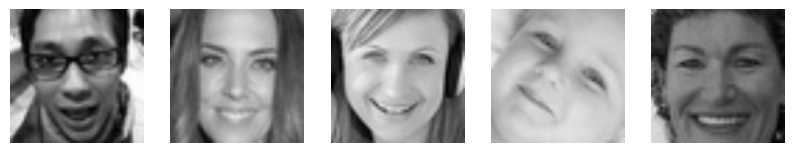

In [ ]:
import os
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define image path
image_folder = "fer2013/train/happy"

# Confirm image path
if os.path.exists(image_folder):
    print("Available images:", os.listdir(image_folder)[:5])  # Show some file names
else:
    print("Error: Image folder not found!")

# Load images
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))][:10]

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Apply transformation
images = [transform(Image.open(img)) for img in image_files]

# Display images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, img in enumerate(images[:5]):
    axes[i].imshow(img.permute(1, 2, 0).numpy())
    axes[i].axis("off")
plt.show()

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
df_sample["predicted_sentiment"] = df_sample["clean_text"].apply(lambda x: classifier(x)[0]["label"])
df_sample.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,sentiment,text,clean_text,predicted_sentiment
0,Negative,@chrishasboobs AHHH I HOPE YOUR OK!!!,chrishasboobs ahhh i hope your ok,POSITIVE
1,Negative,"@misstoriblack cool , i have no tweet apps fo...",misstoriblack cool i have no tweet apps for ...,POSITIVE
2,Negative,@TiannaChaos i know just family drama. its la...,tiannachaos i know just family drama its lame...,NEGATIVE
3,Negative,School email won't open and I have geography ...,school email wont open and i have geography s...,NEGATIVE
4,Negative,upper airways problem,upper airways problem,NEGATIVE


In [42]:
import torch
import torch.nn as nn
import torchvision.models as models

model = models.resnet18(pretrained=True)

num_classes = 7
model.fc = nn.Linear(model.fc.in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)



In [ ]:
print(df_sample.shape)

(1000, 4)


In [ ]:
df_sample.head()

,sentiment,text,clean_text,predicted_sentiment
0,Negative,@chrishasboobs AHHH I HOPE YOUR OK!!!,chrishasboobs ahhh i hope your ok,POSITIVE
1,Negative,"@misstoriblack cool , i have no tweet apps fo...",misstoriblack cool i have no tweet apps for ...,POSITIVE
2,Negative,@TiannaChaos i know just family drama. its la...,tiannachaos i know just family drama its lame...,NEGATIVE
3,Negative,School email won't open and I have geography ...,school email wont open and i have geography s...,NEGATIVE
4,Negative,upper airways problem,upper airways problem,NEGATIVE


In [48]:
df_sample["sentiment"] = df_sample["sentiment"].str.upper()


In [50]:
df_sample.head()

,sentiment,text,clean_text,predicted_sentiment
0,NEGATIVE,@chrishasboobs AHHH I HOPE YOUR OK!!!,chrishasboobs ahhh i hope your ok,POSITIVE
1,NEGATIVE,"@misstoriblack cool , i have no tweet apps fo...",misstoriblack cool i have no tweet apps for ...,POSITIVE
2,NEGATIVE,@TiannaChaos i know just family drama. its la...,tiannachaos i know just family drama its lame...,NEGATIVE
3,NEGATIVE,School email won't open and I have geography ...,school email wont open and i have geography s...,NEGATIVE
4,NEGATIVE,upper airways problem,upper airways problem,NEGATIVE


In [54]:
import plotly.express as px
df_sample["sentiment"] = df_sample["sentiment"].astype(str)
df_sample["predicted_sentiment"] = df_sample["predicted_sentiment"].astype(str)

fig = px.scatter(df_sample, x="sentiment", y="predicted_sentiment", color="predicted_sentiment",
                 title="Sentiment vs Facial Emotion", labels={"predicted_sentiment": "Facial Emotion"})
fig.show()

In [57]:
from sklearn.metrics import accuracy_score

df_sample["sentiment"] = df_sample["sentiment"].astype(str)
df_sample["predicted_sentiment"] = df_sample["predicted_sentiment"].astype(str)

accuracy = accuracy_score(df_sample["sentiment"], df_sample["predicted_sentiment"])

print(f"accuracy: {accuracy:.2%}")


accuracy: 72.00%
